https://www.image-net.org/challenges/LSVRC/2012/index.php

In [ ]:
import tensorflow as tf
#Tensorflow Hub for Transfer Learning
import tensorflow_hub as hub
from tensorflow import keras
import tf_keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import PIL.Image as Image
import numpy as np

The URL is has flower photos with .tgz extension. The file is unzipped twice as the flower_photos.tgz file also contains flower_photos.tar file. the file is saved in a directory. data_dir is a variable that holds the path to the directory where the downloaded dataset was saved.

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

The glob method finds all pathnames matching a specified pattern. In this case, the pattern 'flower_photos/*/*.jpg' looks for files ending with .jpg

In [ ]:
image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))
print(image_count)

3670


**This line is used to get the images in a particular flower type folder for example images in roses folder inside flower photos dierctory.**

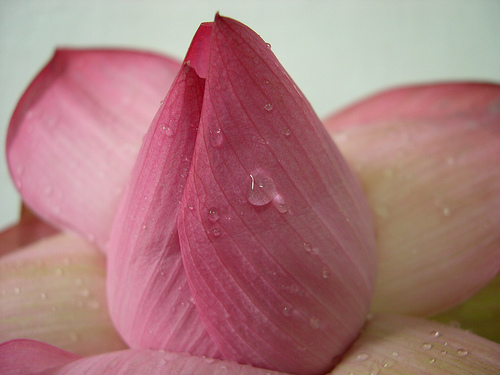

In [ ]:
roses=list(data_dir.glob('flower_photos/roses/*'))
Image.open(str(roses[5]))

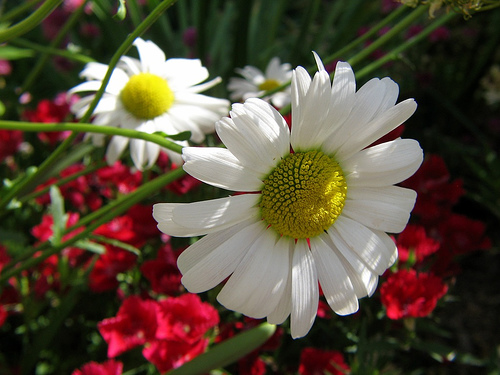

In [ ]:
daisy=list(data_dir.glob('flower_photos/daisy/*'))
Image.open(str(daisy[5]))

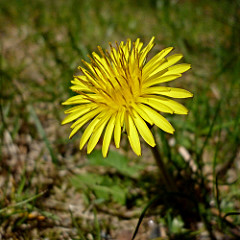

In [ ]:
dandelion=list(data_dir.glob('flower_photos/dandelion/*'))
Image.open(str(dandelion[5]))

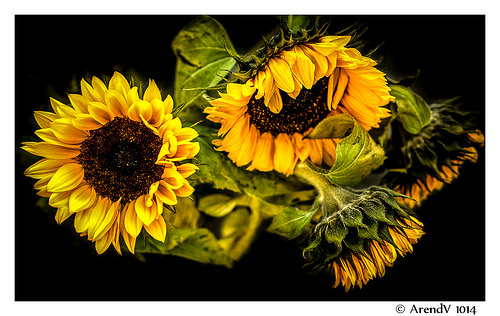

In [ ]:
sunflowers=list(data_dir.glob('flower_photos/sunflowers/*'))
Image.open(str(sunflowers[5]))

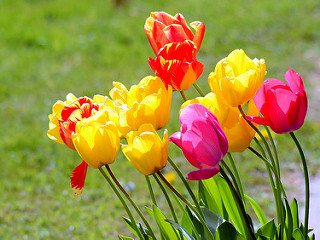

In [ ]:
tulips=list(data_dir.glob('flower_photos/tulips/*'))
Image.open(str(tulips[5]))

**Let's create a flower dictionary for each flower type**

In [ ]:
flowers_images_dict={
    'roses':list(data_dir.glob('flower_photos/roses/*')),
    'daisy':list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion':list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers':list(data_dir.glob('flower_photos/sunflowers/*')),
    'tulips':list(data_dir.glob('flower_photos/tulips/*'))
}

**Encode the flowers classes as we are dealing with classification problem**

In [ ]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

**Let's check the shape of the input image**

In [ ]:
img1=cv2.imread(str(flowers_images_dict['roses'][0]))
img1.shape

(215, 240, 3)

In [ ]:
img2=cv2.imread(str(flowers_images_dict['daisy'][0]))
img2.shape

(213, 320, 3)

In [ ]:
img3=cv2.imread(str(flowers_images_dict['dandelion'][0]))
img3.shape

(335, 500, 3)

In [ ]:
img4=cv2.imread(str(flowers_images_dict['tulips'][0]))
img4.shape

(333, 500, 3)

In [ ]:
img5=cv2.imread(str(flowers_images_dict['sunflowers'][0]))
img5.shape

(240, 168, 3)

Each images is of different sizes

In [ ]:
#Resize img1 to (299,299)
cv2.resize(img1,(299,299)).shape

(299, 299, 3)

In [ ]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(299,299))
        #the resized images are appended to X variable
        X.append(resized_img)
        # the corresponding names of the resized images are appended to y variable
        y.append(flowers_labels_dict[flower_name])


array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
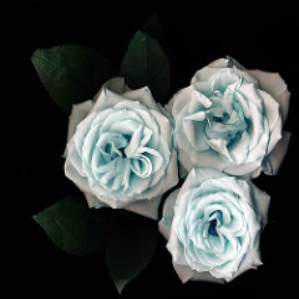

In [ ]:
X[0]

In [ ]:
type(X)

list

In [ ]:
#Convert the X to numpy array as its the fastest data structure for machine learning as its a list of numpy array now
X=np.array(X)
y=np.array(y)

In [ ]:
#Split our X & y to train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

array([[[ 43,  61,  68],
        [ 43,  60,  69],
        [ 42,  59,  69],
        ...,
        [ 30,  74,  61],
        [ 30,  74,  61],
        [ 30,  74,  61]],

       [[ 43,  61,  69],
        [ 43,  60,  70],
        [ 43,  60,  70],
        ...,
        [ 31,  76,  61],
        [ 31,  76,  61],
        [ 31,  76,  61]],

       [[ 44,  61,  70],
        [ 44,  61,  71],
        [ 45,  62,  72],
        ...,
        [ 33,  77,  62],
        [ 34,  78,  62],
        [ 34,  78,  62]],

       ...,

       [[ 39, 113, 122],
        [ 40, 116, 123],
        [ 42, 117, 123],
        ...,
        [  0, 115, 183],
        [  0, 117, 185],
        [  0, 110, 179]],

       [[ 43, 112, 117],
        [ 43, 116, 120],
        [ 43, 117, 122],
        ...,
        [  0, 118, 183],
        [  2, 119, 186],
        [  3, 112, 179]],

       [[ 50, 113, 111],
        [ 48, 116, 115],
        [ 46, 118, 121],
        ...,
        [  0, 123, 187],
        [  5, 126, 191],
        [  9, 119, 185]]], dtype=uint8)
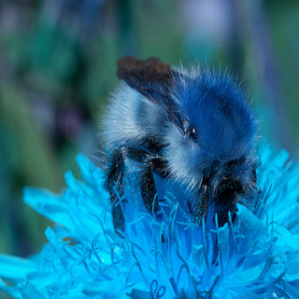

In [ ]:
#Before Scaling
X_train[0] #the array is of many pixel values

In [ ]:
#Normalize/Standardize our input numerical pixel dataset to scale the value between 0 and 1
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
#After Scaling
X_train_scaled[0] #the pixel values are between 0 and 1

array([[[0.16862745, 0.23921569, 0.26666667],
        [0.16862745, 0.23529412, 0.27058824],
        [0.16470588, 0.23137255, 0.27058824],
        ...,
        [0.11764706, 0.29019608, 0.23921569],
        [0.11764706, 0.29019608, 0.23921569],
        [0.11764706, 0.29019608, 0.23921569]],

       [[0.16862745, 0.23921569, 0.27058824],
        [0.16862745, 0.23529412, 0.2745098 ],
        [0.16862745, 0.23529412, 0.2745098 ],
        ...,
        [0.12156863, 0.29803922, 0.23921569],
        [0.12156863, 0.29803922, 0.23921569],
        [0.12156863, 0.29803922, 0.23921569]],

       [[0.17254902, 0.23921569, 0.2745098 ],
        [0.17254902, 0.23921569, 0.27843137],
        [0.17647059, 0.24313725, 0.28235294],
        ...,
        [0.12941176, 0.30196078, 0.24313725],
        [0.13333333, 0.30588235, 0.24313725],
        [0.13333333, 0.30588235, 0.24313725]],

       ...,

       [[0.15294118, 0.44313725, 0.47843137],
        [0.15686275, 0.45490196, 0.48235294],
        [0.16470588, 0

 # **Transfer Learning using inception_v3**

In [ ]:
feature_extractor_modelAPI="https://www.kaggle.com/models/google/inception-v3/TensorFlow2/classification/2"

In [ ]:
pretrained_model_without_topLayer=hub.keras_layer.KerasLayer(feature_extractor_modelAPI,input_shape=(299,299,3),trainable=False)

In [ ]:
import tf_keras
num_of_flowers=5

model=tf_keras.Sequential([
    pretrained_model_without_topLayer,
    layers.Dense(num_of_flowers)
])

# Build the model by providing the input shape
model.build(input_shape=(None, 299, 299, 3)) # The None in the input shape represents the batch size

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrap  (None, 1001)              23853833  
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 5)                 5010      
 apper)                                                          
                                                                 
Total params: 23858843 (91.01 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 23853833 (91.00 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled,y_train,epochs=5)

NameError: name 'model' is not defined

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
predictions=model.predict(np.array(X[0],X[11],X[12]))
predictions

In [ ]:
predictions_out=np.argmax(predictions,axis=1)
predictions_out

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()

print(y[0])